# Deep Learning Intro

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Shallow and Deep Networks

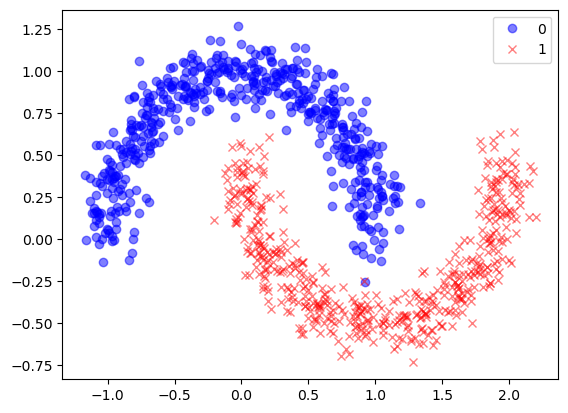

In [2]:
#Run on base environment, plot is not working in other
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=1000, noise=0.1, random_state=0)
plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
plt.legend(['0', '1'])

In [3]:
X.shape

(1000, 2)

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

### Shallow Model

In [7]:
model = Sequential()
model.add(Dense(1, input_shape=(2,), activation='sigmoid')) #hidden layer
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In the given model, the architecture is kept very simple for a specific reason, likely because it is intended for a very basic binary classification task with just two input features. Let's delve into why certain layers and components, like convolutional layers, pooling layers, and additional activation functions, are not included:

## Convolutional Layers and Pooling Layers
#### Convolutional Layers:

Convolutional layers are designed to handle spatial data and are particularly useful for image processing tasks where you want to detect patterns such as edges, textures, and objects. They work by applying convolutional filters that move across the input data to create feature maps.
Since the input shape in this model is (2,), implying there are only two features (not spatially organized data like an image), convolutional layers are not necessary.

#### Pooling Layers:

Pooling layers, such as max pooling or average pooling, are typically used in conjunction with convolutional layers to reduce the spatial dimensions of the feature maps, which helps in reducing the number of parameters and computation in the network.
Again, given the input is a simple 2-dimensional vector (and not spatial data), pooling layers are irrelevant for this model.

## Activation Function
#### Activation Functions:
Activation functions introduce non-linearity into the model, allowing it to learn more complex patterns. Common activation functions include ReLU, sigmoid, and tanh.

In this model, a sigmoid activation function is used in the output layer. The sigmoid function is appropriate for binary classification tasks as it outputs a probability between 0 and 1, which is ideal for determining one of two classes.

## Why the Simplicity?

#### Task Simplicity: 
The model appears to be designed for a very basic binary classification problem where the input data is not spatially complex. Thus, there is no need for convolutional or pooling layers.

#### Feature Size: 
With only two input features, a deep or complex network is unnecessary. A single dense layer can be sufficient to map these features to the output.

#### Ease of Understanding: 
This model serves as a simple and clear example of how to set up a neural network for binary classification, making it easy to understand for beginners.

## When to Use More Complex Layers?
You would consider using convolutional and pooling layers when dealing with more complex, spatially organized data, like images, where you need to capture and learn from local patterns. For example:

#### Image Classification: 
Using ConvNets to classify images (e.g., identifying objects in a photo).
#### Image Segmentation: 
Detecting and delineating objects within images.
#### Object Detection: 
Identifying and locating objects within images.
In summary, the given model's simplicity is tailored to the specific nature of the task and the type of input data. More complex layers are not included because they are not needed for this straightforward binary classification problem.

In [8]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [9]:
results = model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8540 - loss: 0.3028  


In [10]:
results

[0.3182263672351837, 0.8433333039283752]

In [11]:
print("The Accuracy score on the Train set is:\t{:0.3f}".format(results[1]))

The Accuracy score on the Train set is:	0.843


319/319 ━━━━━━━━━━━━━━━━━━━━ 0s 979us/step


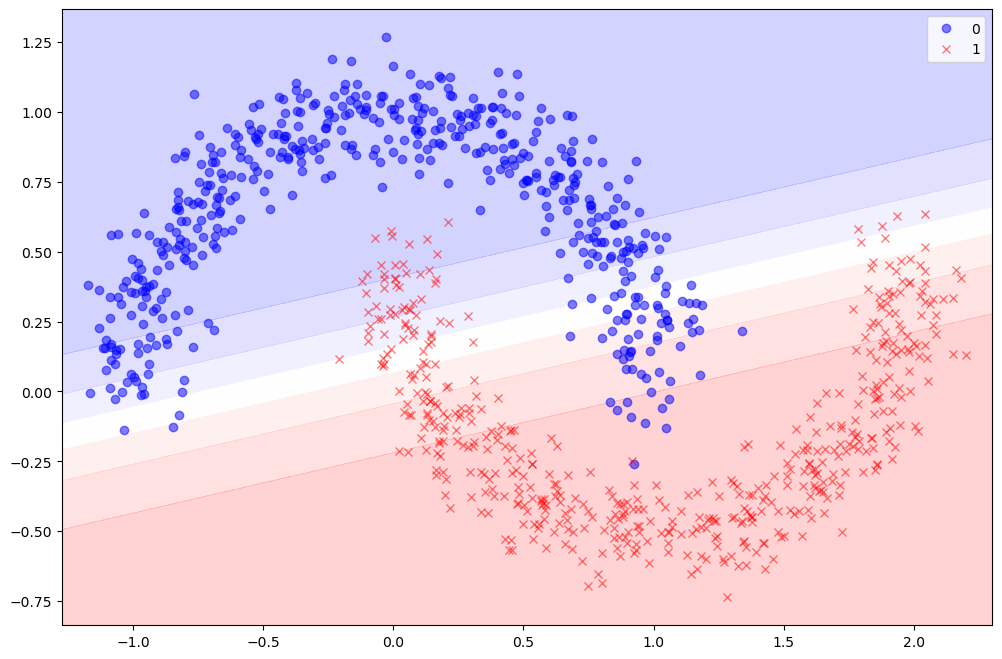

In [12]:
def plot_decision_boundary(model, X, y):
    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    c = model.predict(ab)
    cc = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    plt.contourf(aa, bb, cc, cmap='bwr', alpha=0.2)
    plt.plot(X[y==0, 0], X[y==0, 1], 'ob', alpha=0.5)
    plt.plot(X[y==1, 0], X[y==1, 1], 'xr', alpha=0.5)
    plt.legend(['0', '1'])
    
plot_decision_boundary(model, X, y)

### Deep model

In [13]:
model = Sequential()
model.add(Dense(4, input_shape=(2,), activation='tanh')) # 1 Hidden layer
model.add(Dense(2, activation='tanh')) #2nd hidden layer
model.add(Dense(1, activation='sigmoid')) #output
model.compile(Adam(learning_rate=0.05), 'binary_crossentropy', metrics=['accuracy'])

## What the Model is Doing
#### Input Layer:

The model expects input data with 2 features.

#### First Hidden Layer:

The first dense layer has 4 neurons with a tanh activation function. This layer learns to extract features from the input data and normalizes the outputs between -1 and 1.

#### Second Hidden Layer:

The second dense layer has 2 neurons with a tanh activation function. This layer processes the features extracted by the first hidden layer and learns more complex representations.

#### Output Layer:

The final dense layer has 1 neuron with a sigmoid activation function. This layer outputs a value between 0 and 1, representing the probability of the input belonging to the positive class (e.g., class 1) in a binary classification task.

#### Summary
The model is a neural network designed for a binary classification task.
It has 2 hidden layers with tanh activation functions, which help in normalizing the data and learning complex patterns.
The output layer uses a sigmoid activation function to produce a probability score for binary classification.
The model is compiled with the Adam optimizer and binary cross-entropy loss function, tracking accuracy as a performance metric.
This model is more complex than a simple single-layer network and can capture more intricate relationships in the data due to its additional hidden layers and neurons. It is suitable for problems where the input features have some non-linear relationships that need to be learned for effective classification.

In [14]:
model.fit(X_train, y_train, epochs=200, verbose=0)

In [15]:
model.evaluate(X_test, y_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0080      


[0.010466166771948338, 0.996666669845581]

In [16]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [17]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [18]:
import numpy as np

# Convert predicted probabilities to binary predictions
y_train_pred_binary = np.where(y_train_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = np.mean(y_train == y_train_pred_binary)

print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy))


The Accuracy score on the Train set is:	0.501


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score

# Convert predicted probabilities to binary predictions
y_test_pred_binary = np.where(y_test_pred > 0.5, 1, 0)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_pred_binary)

print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy))


The Accuracy score on the Test set is:	0.997


In [20]:
# print("The Accuracy score on the Train set is:\t{:0.3f}".format(accuracy_score(y_train, y_train_pred)))
# print("The Accuracy score on the Test set is:\t{:0.3f}".format(accuracy_score(y_test, y_test_pred)))

319/319 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


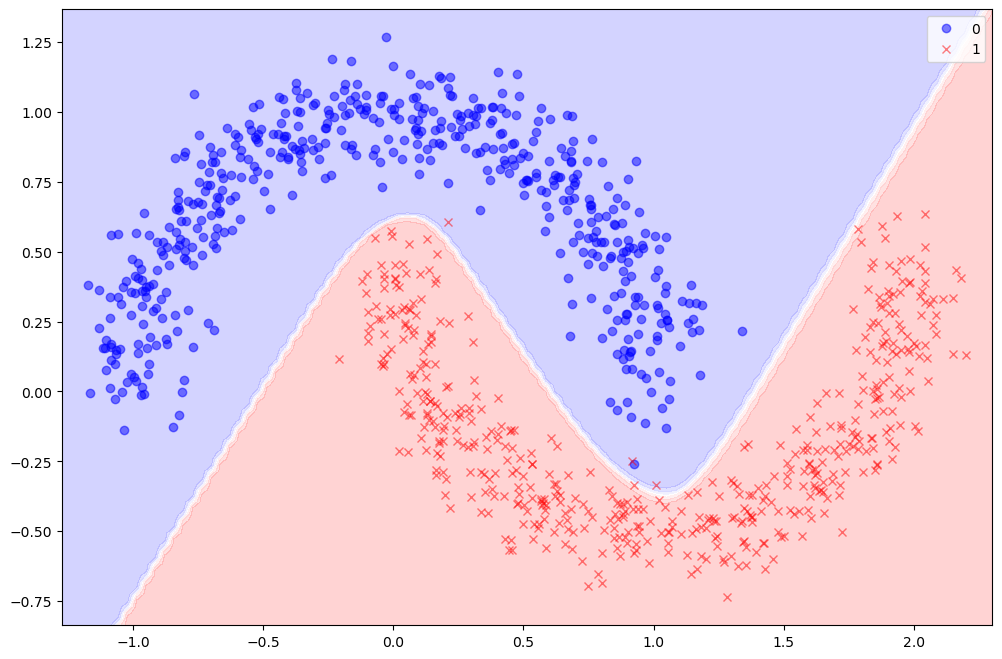

In [21]:
plot_decision_boundary(model, X, y)

## Multiclass classification

### The Iris dataset

In [24]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\3. Deep Learning\1. ANN\iris.csv')

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating ins

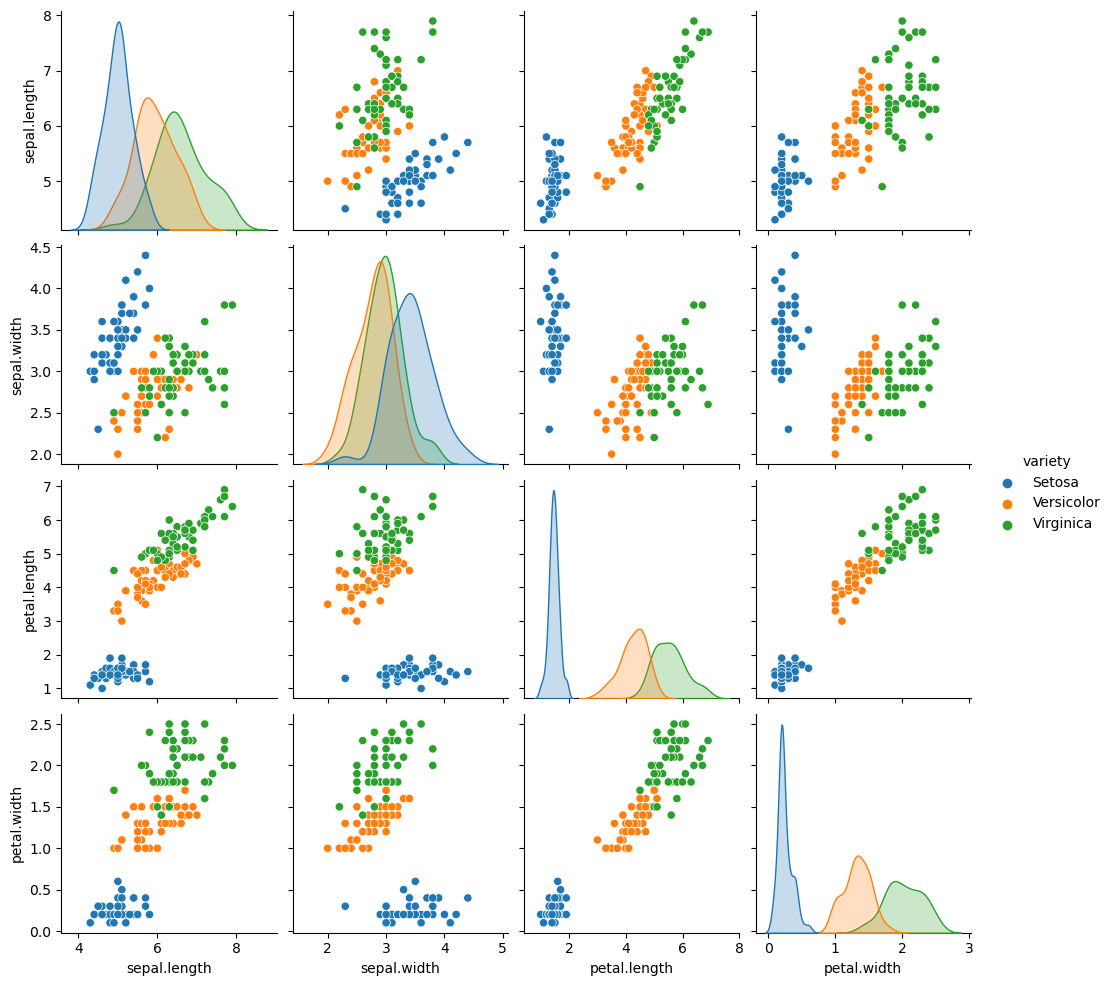

In [26]:
import seaborn as sns
sns.pairplot(df, hue="variety")

In [27]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [28]:
X = df.drop('variety', axis=1)
X.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [29]:
target_names = df['variety'].unique()
target_names

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

In [30]:
target_dict = {n:i for i, n in enumerate(target_names)}
target_dict

{'Setosa': 0, 'Versicolor': 1, 'Virginica': 2}

In [31]:
y= df['variety'].map(target_dict)
y.head()

0    0
1    0
2    0
3    0
4    0
Name: variety, dtype: int64

In [32]:
from tensorflow.keras.utils import to_categorical

In [33]:
y_cat = to_categorical(y)

In [31]:
y_cat[:10]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y_cat,
                                                    test_size=0.2)

In [42]:
model = Sequential()
model.add(Dense(3, input_shape=(4,), activation='softmax'))
model.compile(Adam(learning_rate=0.1),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

C:\Users\monika201103\Anaconda3\lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.2847 - loss: 3.2378 - val_accuracy: 0.1667 - val_loss: 2.2027
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1833 - loss: 1.7198 - val_accuracy: 0.7500 - val_loss: 0.9142
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5471 - loss: 1.1114 - val_accuracy: 0.5833 - val_loss: 0.6926
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.3116 - loss: 0.8981 - val_accuracy: 0.5833 - val_loss: 0.7448
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5978 - loss: 0.7007 - val_accuracy: 0.6667 - val_loss: 0.6405
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6409 - loss: 0.6067 - val_accuracy: 0.6667 - val_loss: 0.6006
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6363 - loss: 0.5692 - val_accuracy: 0.6667 - val_loss: 0.6002
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6845 - loss: 0.5292 - val_accuracy: 0.7500 - val_loss: 0.5603


In [35]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [36]:
y_pred[:5]

array([[1.2234783e-02, 6.8233347e-01, 3.0543175e-01],
       [9.1235165e-04, 2.9415730e-01, 7.0493037e-01],
       [4.7653602e-03, 5.6482005e-01, 4.3041462e-01],
       [9.3161952e-01, 6.7535236e-02, 8.4524596e-04],
       [2.5394946e-02, 5.3741646e-01, 4.3718857e-01]], dtype=float32)

In [37]:
y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

In [38]:
from sklearn.metrics import classification_report

In [39]:
print(classification_report(y_test_class, y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [40]:
confusion_matrix(y_test_class, y_pred_class)

array([[11,  0,  0],
       [ 0, 10,  0],
       [ 0,  0,  9]], dtype=int64)

## Exercise 1

The [Pima Indians dataset](https://archive.ics.uci.edu/ml/datasets/diabetes) is a very famous dataset distributed by UCI and originally collected from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains data from clinical exams for women age 21 and above of Pima indian origins. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

It has the following features:

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)

The last colum is the outcome, and it is a binary variable.

In this first exercise we will explore it through the following steps:

1. Load the ..data/diabetes.csv dataset, use pandas to explore the range of each feature
- For each feature draw a histogram. Bonus points if you draw all the histograms in the same figure.
- Explore correlations of features with the outcome column. You can do this in several ways, for example using the `sns.pairplot` we used above or drawing a heatmap of the correlations.
- Do features need standardization? If so what stardardization technique will you use? MinMax? Standard?
- Prepare your final `X` and `y` variables to be used by a ML model. Make sure you define your target variable well. Will you need dummy columns?

## Exercise 2

Build a fully connected NN model that predicts diabetes. Follow these steps:

1. Split your data in a train/test with a test size of 20% and a `random_state = 22`
- define a sequential model with at least one inner layer. You will have to make choices for the following things:
    - what is the size of the input?
    - how many nodes will you use in each layer?
    - what is the size of the output?
    - what activation functions will you use in the inner layers?
    - what activation function will you use at output?
    - what loss function will you use?
    - what optimizer will you use?
- fit your model on the training set, using a validation_split of 0.1
- test your trained model on the test data from the train/test split
- check the accuracy score, the confusion matrix and the classification report

## Exercise 3
Compare your work with the results presented in [this notebook](https://www.kaggle.com/futurist/d/uciml/pima-indians-diabetes-database/pima-data-visualisation-and-machine-learning). Are your Neural Network results better or worse than the results obtained by traditional Machine Learning techniques?

- Try training a Support Vector Machine or a Random Forest model on the exact same train/test split. Is the performance better or worse?
- Try restricting your features to only 4 features like in the suggested notebook. How does model performance change?

## Exercise 4

[Tensorflow playground](http://playground.tensorflow.org/) is a web based neural network demo. It is really useful to develop an intuition about what happens when you change architecture, activation function or other parameters. Try playing with it for a few minutes. You don't need do understand the meaning of every knob and button in the page, just get a sense for what happens if you change something. In the next chapter we'll explore these things in more detail.
